In [3]:
pip install opencv-python numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 114.3 kB/s eta 0:00:0000:010:16m

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# making all the necessary imports here
import numpy as np
# import cv2
import matplotlib.pyplot as plt
# drive.mount('/content/drive')
# import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
# from google.colab.patches import cv2_imshow
# you may include more libraries here if needed

Original Image Dimensions: (466, 350, 3)
Greyscaled Image Dimensions: (466, 350)


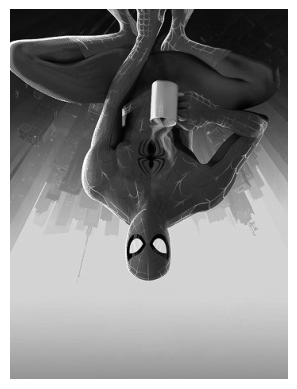

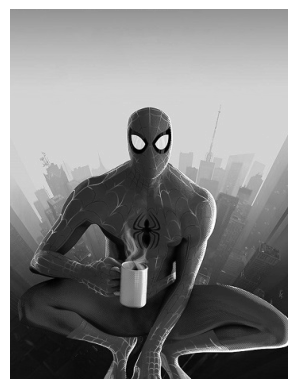

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = '/Users/hassanadnan/Desktop/CV_PA1/assets/upside-down-me.jpg'  # Adjust the path as needed
image = cv2.imread(image_path)

# Display its dimensions
print("Original Image Dimensions:", image.shape)


# Greyscale it
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Display the dimensions of the greyscalled image
print("Greyscaled Image Dimensions:", grey_image.shape)


# *Answer the question given in the text cell above*


# Display the greyscalled image
plt.imshow(grey_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Correct the poster of spidey and display it
corrected_image = np.rot90(grey_image, k=2)  # Rotating 180 degrees
plt.imshow(corrected_image, cmap='gray')
plt.axis('off')
plt.show()

### Zero-Padding 

In [9]:
def zero_pad(X, pad):
    """
    Arguments:
    X -- python numpy array of shape (H, W) representing an image
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    """
    # Get the dimensions of the original image
    H, W = X.shape
    
    # Create a new array with the new dimensions (H + 2*pad, W + 2*pad)
    X_pad = np.zeros((H + 2 * pad, W + 2 * pad), dtype=X.dtype)
    
    # Copy the original image into the center of the new array
    X_pad[pad:pad + H, pad:pad + W] = X
    
    return X_pad


In [10]:
# Example image (3x3)
image = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Apply zero padding
padded_image = zero_pad(image, 1)

# Print results
print("Original Image:\n", image)
print("Padded Image:\n", padded_image)


Original Image:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Padded Image:
 [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


### Visualization of Zero padding


Shape of x_pad:  (7, 7)


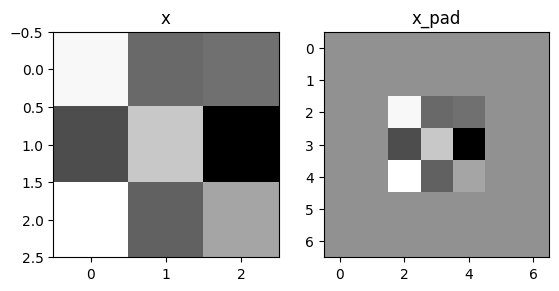

In [11]:
# visualizing the zero_pad's fucntion's output.
np.random.seed(1)
x = np.random.randn(3, 3)
x_pad = zero_pad(x, 2)
print("Shape of x_pad: ", x_pad.shape)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x,cmap='gray')
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad,cmap='gray')

### 2D Convolution 



- Takes an input image
- Applies a filter keeping as per padding and stride parameters
- Outputs another image (usually, but not necessarily, of different size)

In [12]:
def conv2D(inp, F, pad, stride):
    """
    Arguments:
    inp -- output activations of the previous layer (can also be conceptualized as the input image), numpy array of shape (n_H, n_W)
    F -- Filter, numpy array of shape (f, f)
    pad -- integer, amount of padding
    stride -- integer, stride length
    """
    # Get dimensions of the input and the filter
    n_H, n_W = inp.shape
    f, _ = F.shape
    
    # Apply padding to the input image
    inp_padded = zero_pad(inp, pad)
    
    # Calculate the dimensions of the output
    out_height = ((n_H + 2 * pad - f) // stride) + 1
    out_width = ((n_W + 2 * pad - f) // stride) + 1
    
    # Initialize the output matrix with zeros
    conv_output = np.zeros((out_height, out_width))
    
    # Perform the convolution operation
    for i in range(out_height):
        for j in range(out_width):
            # Find the top-left corner of the current slice
            vert_start = i * stride
            vert_end = vert_start + f
            horiz_start = j * stride
            horiz_end = horiz_start + f
            
            # Slice the input image and apply the filter
            current_slice = inp_padded[vert_start:vert_end, horiz_start:horiz_end]
            conv_output[i, j] = np.sum(current_slice * F)
    
    return conv_output


In [13]:
# Example input image (5x5)
input_image = np.array([[1, 2, 3, 0, 1],
                        [0, 1, 2, 3, 2],
                        [3, 1, 0, 2, 1],
                        [2, 3, 0, 0, 3],
                        [1, 2, 1, 2, 1]])

# Example filter (3x3)
filter = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Apply 2D convolution with padding 1 and stride 1
output = conv2D(input_image, filter, pad=1, stride=1)

# Print the output
print("Convolved Output:\n", output)


Convolved Output:
 [[ -2.  -3.  -8.   7.  -2.]
 [  5.   1.  -1.  -6.  -3.]
 [ -9.   3.   5.  -4.   3.]
 [ -1.  -7.   4.   7. -10.]
 [  0.  -3.   0.  -6.   1.]]


### Testing Convolution 


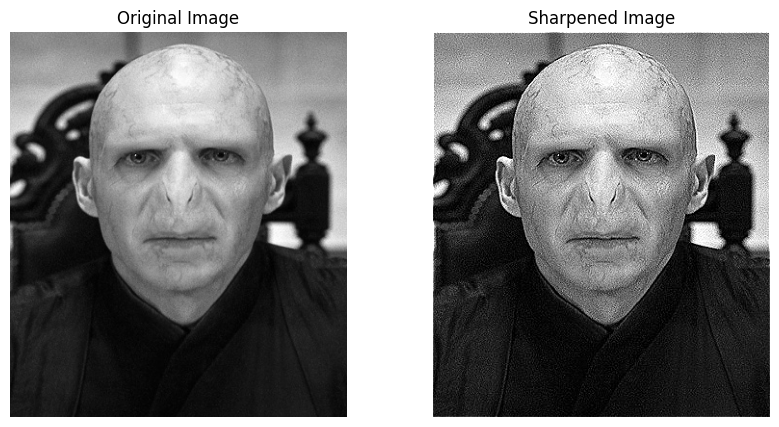

In [156]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

sharpen_filter = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])

image_path = '/Users/hassanadnan/Desktop/CV_PA1/assets/voldemort.jpg'  # Update path as needed
voldemort_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if voldemort_img is None:
    print("Error loading image. Please check the file path or format.")
else:
    # Resize the image to 350x400
    voldemort_resized = cv2.resize(voldemort_img, (350, 400))

    sharpened_img = conv2D(voldemort_resized, sharpen_filter, pad=1, stride=1)

    sharpened_img = np.clip(sharpened_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(voldemort_resized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Sharpened Image")
    plt.imshow(sharpened_img, cmap='gray')
    plt.axis('off')

    plt.show()


### Filter Banks 

### Edge Detection 

Skipping non-image file: .DS_Store
Number of images loaded: 12


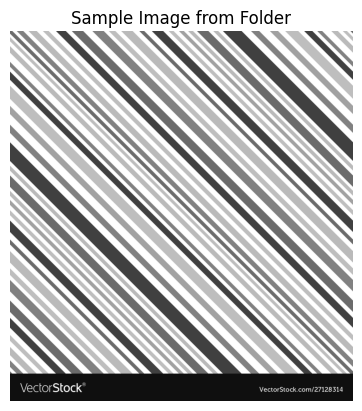

In [157]:
import cv2
import os
import matplotlib.pyplot as plt

images_folder = '/Users/hassanadnan/Desktop/CV_PA1/Images'  

# Valid image extensions
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

def read_images_from_subfolders(folder_path, valid_extensions):
    images = []
    for root, dirs, files in os.walk(folder_path):  
        for filename in files:
            if filename.lower().endswith(valid_extensions):
                img_path = os.path.join(root, filename)  
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(img)
                else:
                    print(f"Failed to read image: {img_path}")
            else:
                print(f"Skipping non-image file: {filename}")
    return images

input_images = read_images_from_subfolders(images_folder, valid_extensions)

print(f"Number of images loaded: {len(input_images)}")

if len(input_images) > 0:
    plt.imshow(input_images[5], cmap='gray')
    plt.title("Sample Image from Folder")
    plt.axis('off')
    plt.show()
else:
    print("No images were loaded. Please check the folder structure and image files.")


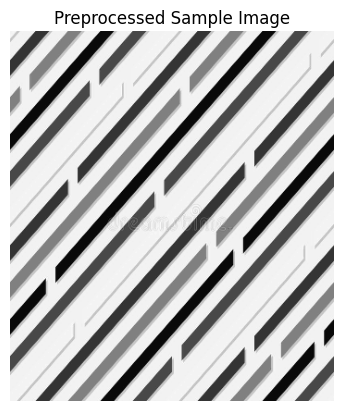

In [158]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image, target_size=(350, 400)):
    resized_image = cv2.resize(image, target_size)
    
    if len(resized_image.shape) == 3:
        grey_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grey_image = resized_image
    
    return grey_image

# preprocessing 
preprocessed_list_of_images = [preprocess_image(image) for image in input_images]


if len(preprocessed_list_of_images) > 0:
    plt.imshow(preprocessed_list_of_images[0], cmap='gray')
    plt.title("Preprocessed Sample Image")
    plt.axis('off')
    plt.show()
else:
    print("No images to display after preprocessing.")


#### Horizontal Filter 🚥

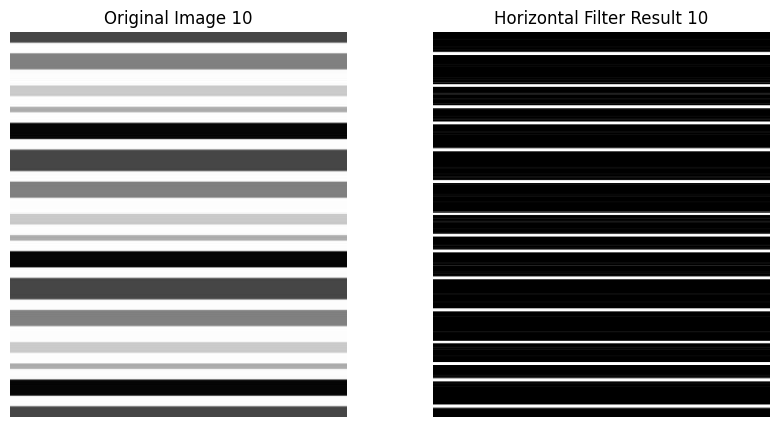

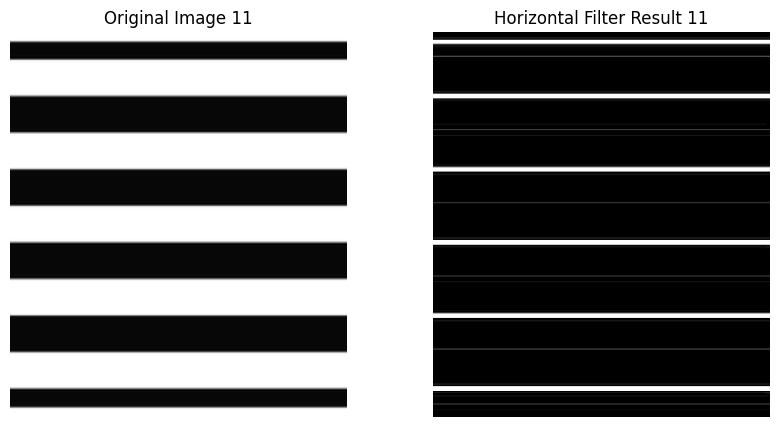

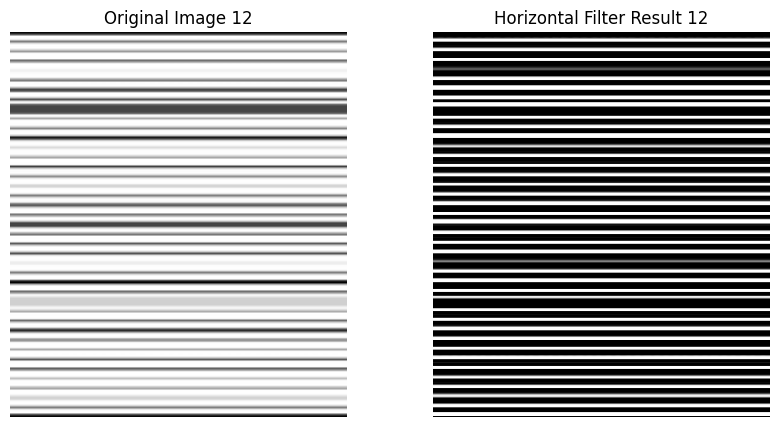

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

h_filter = np.array([
    [ 4,  4,  4],
    [ 0,  0,  0],
    [-4, -4, -4]
])

if preprocessed_list_of_images:
    last_three_images = preprocessed_list_of_images[-3:]  
    for i, image in enumerate(last_three_images):
        filtered_image = cv2.filter2D(image, -1, h_filter)
        
        plt.figure(figsize=(10, 5))
        
        # Original Image
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {len(preprocessed_list_of_images) - 2 + i}')  
        plt.axis('off')
        
        # Filtered Image
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Horizontal Filter Result {len(preprocessed_list_of_images) - 2 + i}')  
        plt.axis('off')
        
        plt.show()
else:
    print("No preprocessed images to apply the filter.")


#### Vertical Filter 🚦

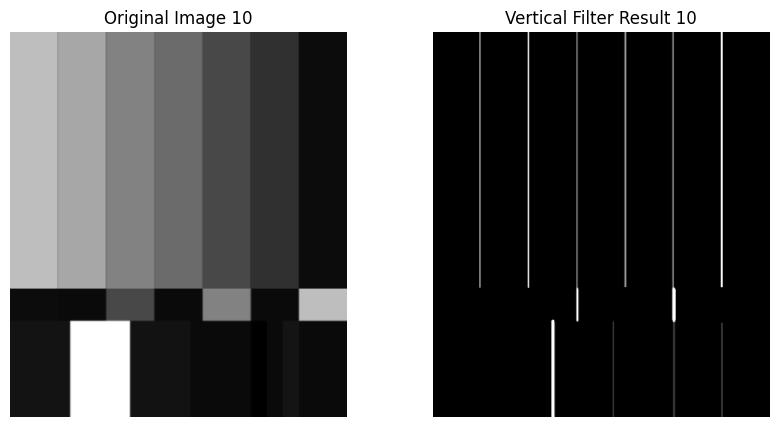

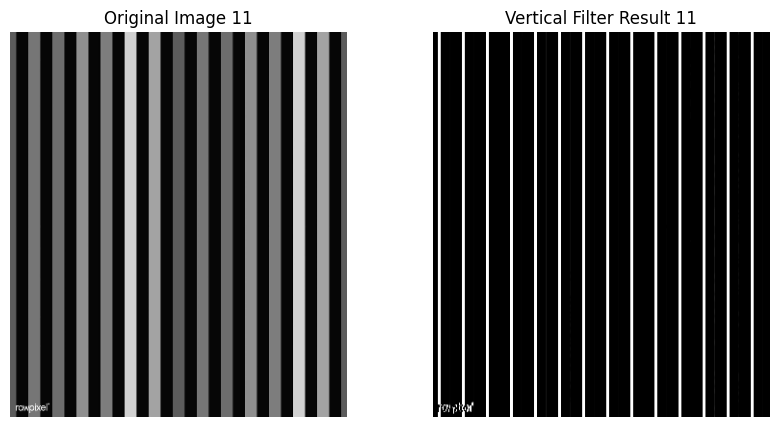

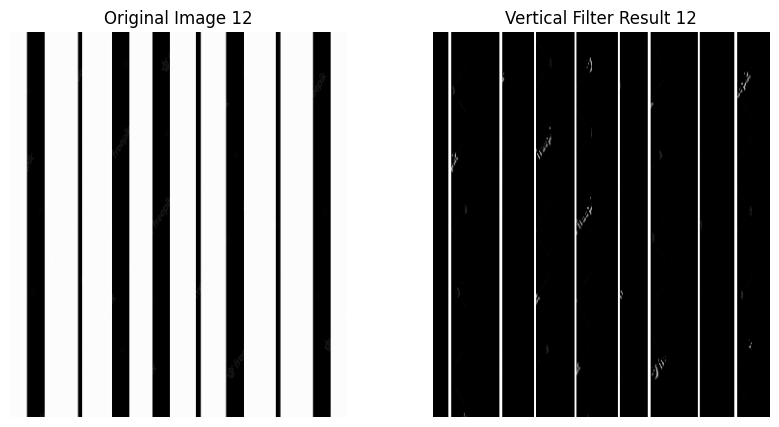

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

v_filter = np.array([
    [ 3,  0, -4],
    [ 3,  0, -3],
    [ 3,  0, -3]
])

if preprocessed_list_of_images:
    last_three_images = preprocessed_list_of_images[6:9]  
    for i, image in enumerate(last_three_images):
        filtered_image = cv2.filter2D(image, -1, v_filter)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {len(preprocessed_list_of_images) - 2 + i}')  # Adjust title for original index
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Vertical Filter Result {len(preprocessed_list_of_images) - 2 + i}')  # Adjust title for filtered index
        plt.axis('off')
        
        plt.show()
else:
    print("No preprocessed images to apply the filter.")


#### Right to Left Diagonal Filter 🙆🏻‍♂️

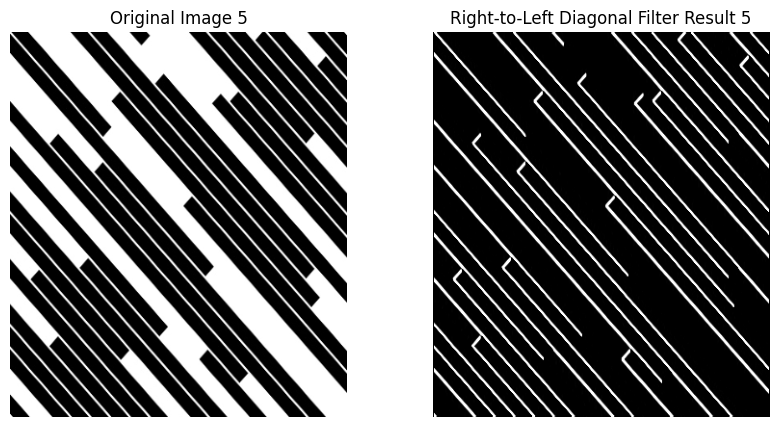

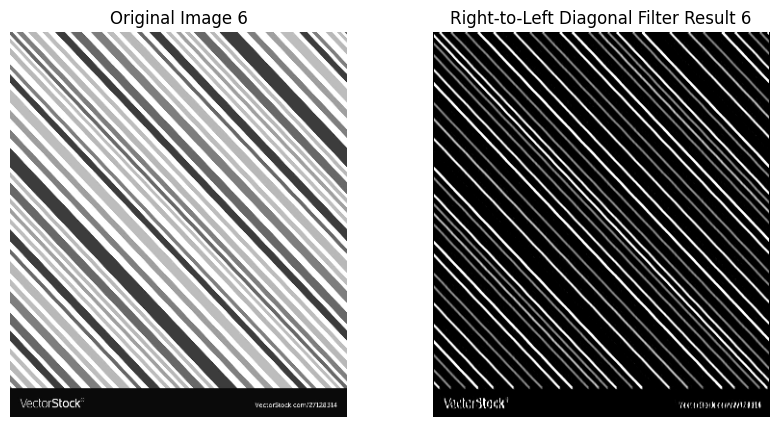

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

rlDiag_filter = np.array([
    [ 1, 0, -1],
    [ 1, 0, -1],
    [ 1, 0, -1]
])

if preprocessed_list_of_images:
    images_5_and_6 = preprocessed_list_of_images[4:6]  
    
    for i, image in enumerate(images_5_and_6):
        filtered_image = cv2.filter2D(image, -1, rlDiag_filter)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {5 + i}')  
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Right-to-Left Diagonal Filter Result {5 + i}')  
        plt.axis('off')
        
        plt.show()
else:
    print("No preprocessed images to apply the filter.")


#### Left to Right Diagonal Filter 🙆🏻‍♀️

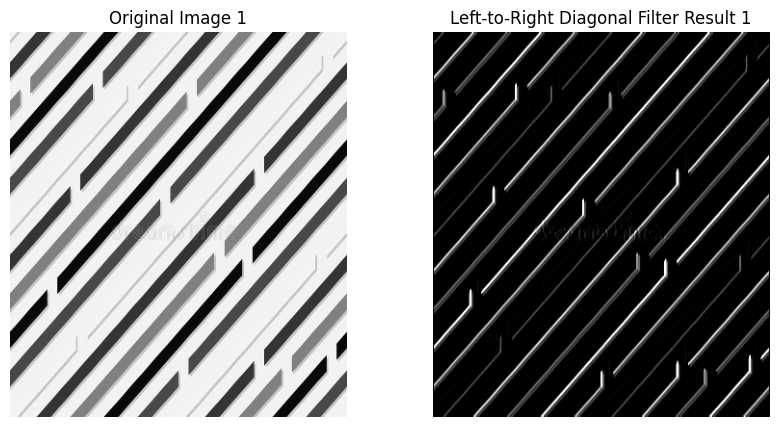

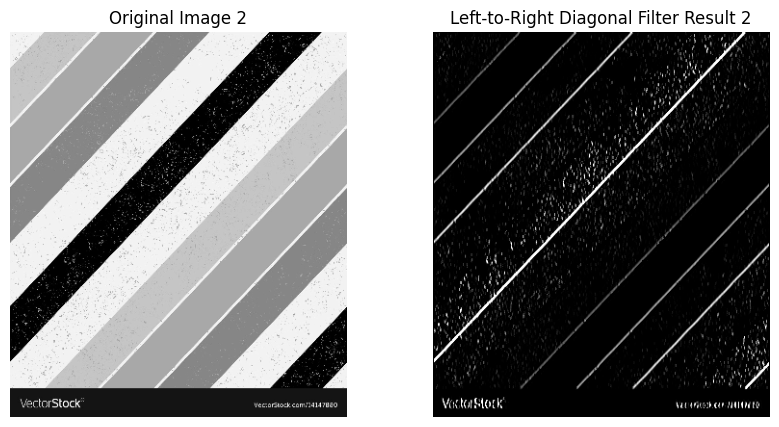

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

lrDiag_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

if preprocessed_list_of_images:
    images_1_and_2 = preprocessed_list_of_images[0:2]  
    
    for i, image in enumerate(images_1_and_2):
        filtered_image = cv2.filter2D(image, -1, lrDiag_filter)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {1 + i}')  
        plt.axis('off')
        
        # Filtered Image
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Left-to-Right Diagonal Filter Result {1 + i}')  
        plt.axis('off')
        
        plt.show()
else:
    print("No preprocessed images to apply the filter.")


#### Circle Filter ⭕

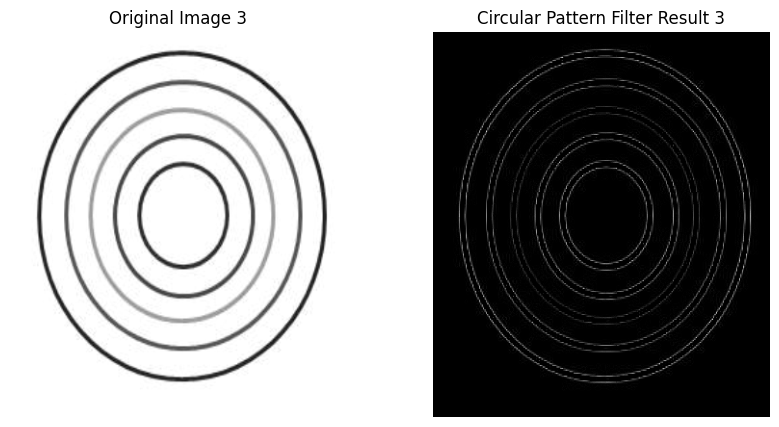

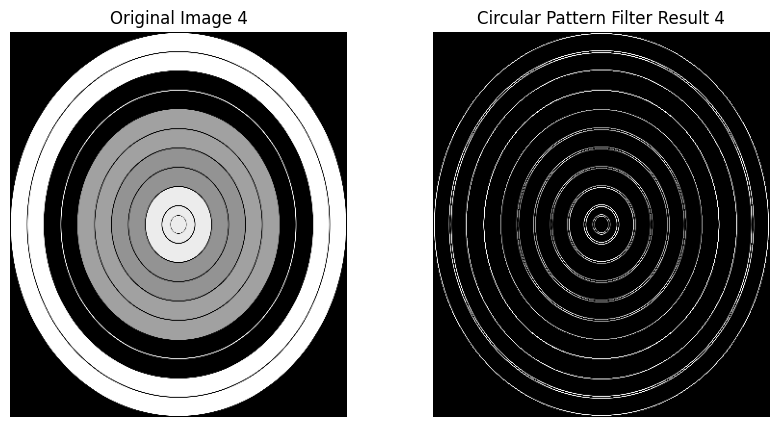

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

circular_filter = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

if preprocessed_list_of_images:
    images_3_and_4 = preprocessed_list_of_images[2:4] 
    
    for i, image in enumerate(images_3_and_4):
        filtered_image = cv2.filter2D(image, -1, circular_filter)
        
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Original Image {3 + i}')  
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(f'Circular Pattern Filter Result {3 + i}')  
        plt.axis('off')
        
        plt.show()
else:
    print("No preprocessed images to apply the filter.")


#### Fun Part 👻

Number of target images loaded: 4


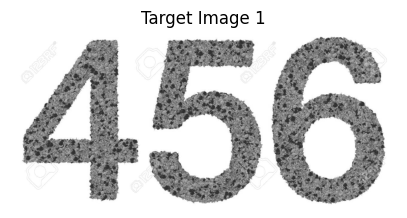

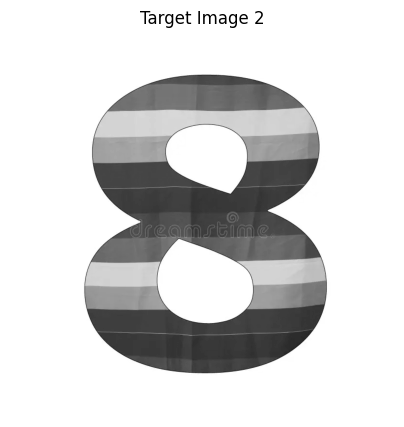

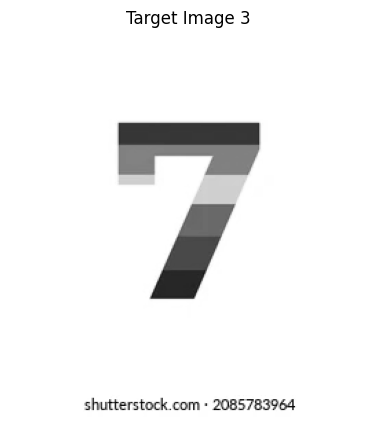

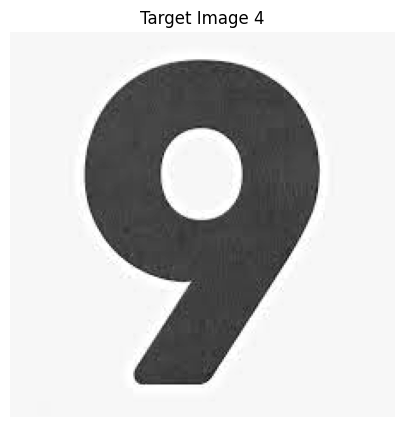

In [165]:

target_images = None



import cv2
import os
import matplotlib.pyplot as plt

target_images_folder = '/Users/hassanadnan/Desktop/CV_PA1/Target_Images'  

def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

target_images = read_images_from_folder(target_images_folder)

print(f"Number of target images loaded: {len(target_images)}")

if target_images:
    for i, image in enumerate(target_images):
        plt.figure(figsize=(5, 5))
        plt.imshow(image, cmap='gray')
        plt.title(f'Target Image {i + 1}')
        plt.axis('off')
        plt.show()
else:
    print("No target images found.")

#################

### Combining Filters 

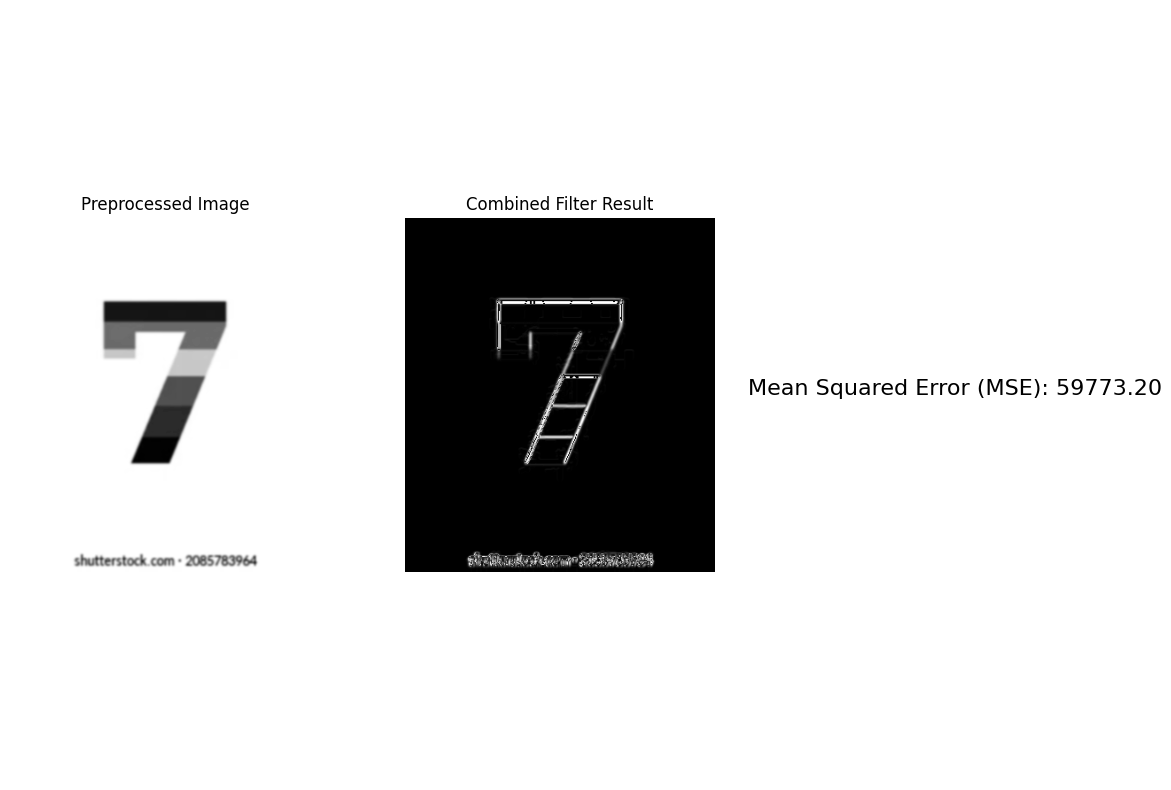

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



def read_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (350, 400))
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
    return blurred_image

image_path = '/Users/hassanadnan/Desktop/CV_PA1/Target_Images/seven.png'
preprocessed_image = read_and_preprocess_image(image_path)

filtered_circular = cv2.filter2D(preprocessed_image, -1, circular_filter)
filtered_lrDiag = cv2.filter2D(preprocessed_image, -1, lrDiag_filter)
filtered_rlDiag = cv2.filter2D(preprocessed_image, -1, rlDiag_filter)
filtered_v = cv2.filter2D(preprocessed_image, -1, v_filter)
filtered_h = cv2.filter2D(preprocessed_image, -1, h_filter)

# Combine the filters
combined_filter = (filtered_circular + filtered_lrDiag + filtered_rlDiag + filtered_v + filtered_h) / 5

combined_filter_display = cv2.normalize(combined_filter, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Calculate Mean Squared Error (MSE)
mse = np.mean((preprocessed_image.astype("float") - combined_filter) ** 2)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(combined_filter_display, cmap='gray')
plt.title('Combined Filter Result')
plt.axis('off')

# Display MSE
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=16, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()


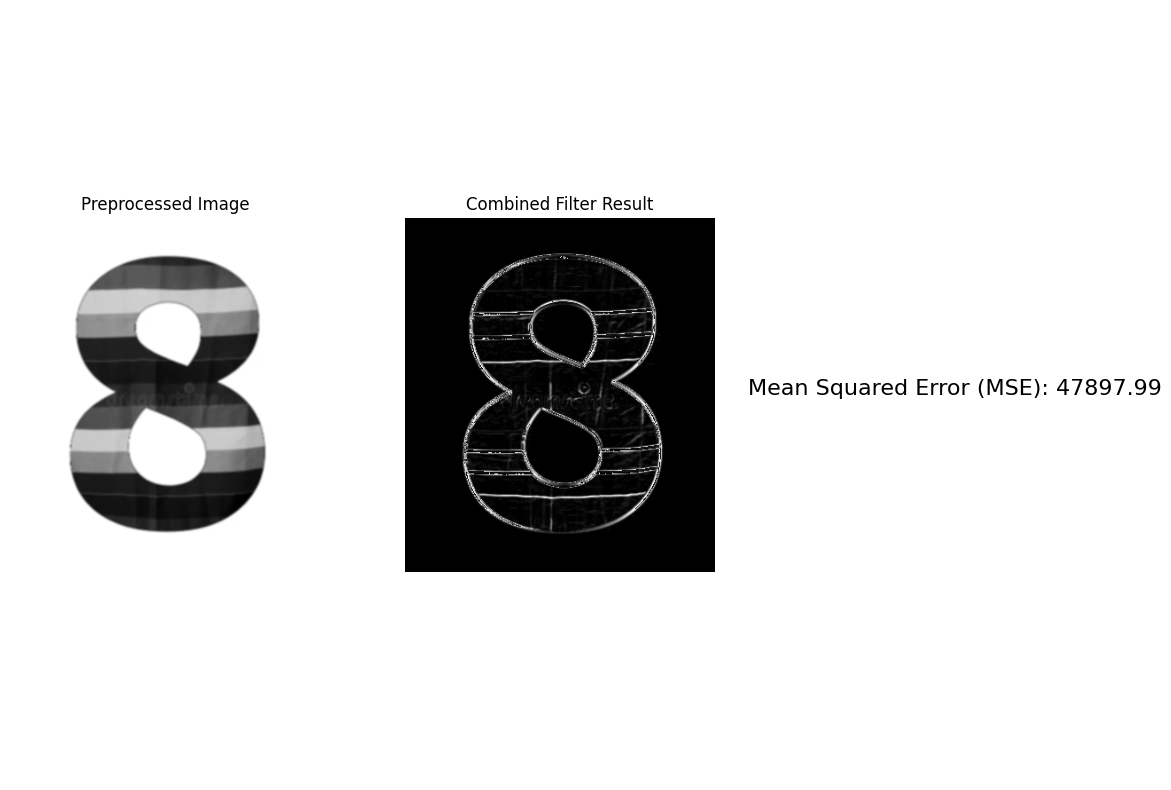

In [167]:

eight_filter = None

### Code Here ###
import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (350, 400))
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
    return blurred_image

image_path = '/Users/hassanadnan/Desktop/CV_PA1/Target_Images/eight.png'
preprocessed_image = read_and_preprocess_image(image_path)

filtered_circular = cv2.filter2D(preprocessed_image, -1, circular_filter)
filtered_lrDiag = cv2.filter2D(preprocessed_image, -1, lrDiag_filter)
filtered_rlDiag = cv2.filter2D(preprocessed_image, -1, rlDiag_filter)
filtered_v = cv2.filter2D(preprocessed_image, -1, v_filter)
filtered_h = cv2.filter2D(preprocessed_image, -1, h_filter)

# Combine the filters
combined_filter = (filtered_circular + filtered_lrDiag + filtered_rlDiag + filtered_v + filtered_h) / 5

combined_filter_display = cv2.normalize(combined_filter, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Calculate Mean Squared Error (MSE)
mse = np.mean((preprocessed_image.astype("float") - combined_filter) ** 2)

plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(combined_filter_display, cmap='gray')
plt.title('Combined Filter Result')
plt.axis('off')

# Display MSE
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=16, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()



#################

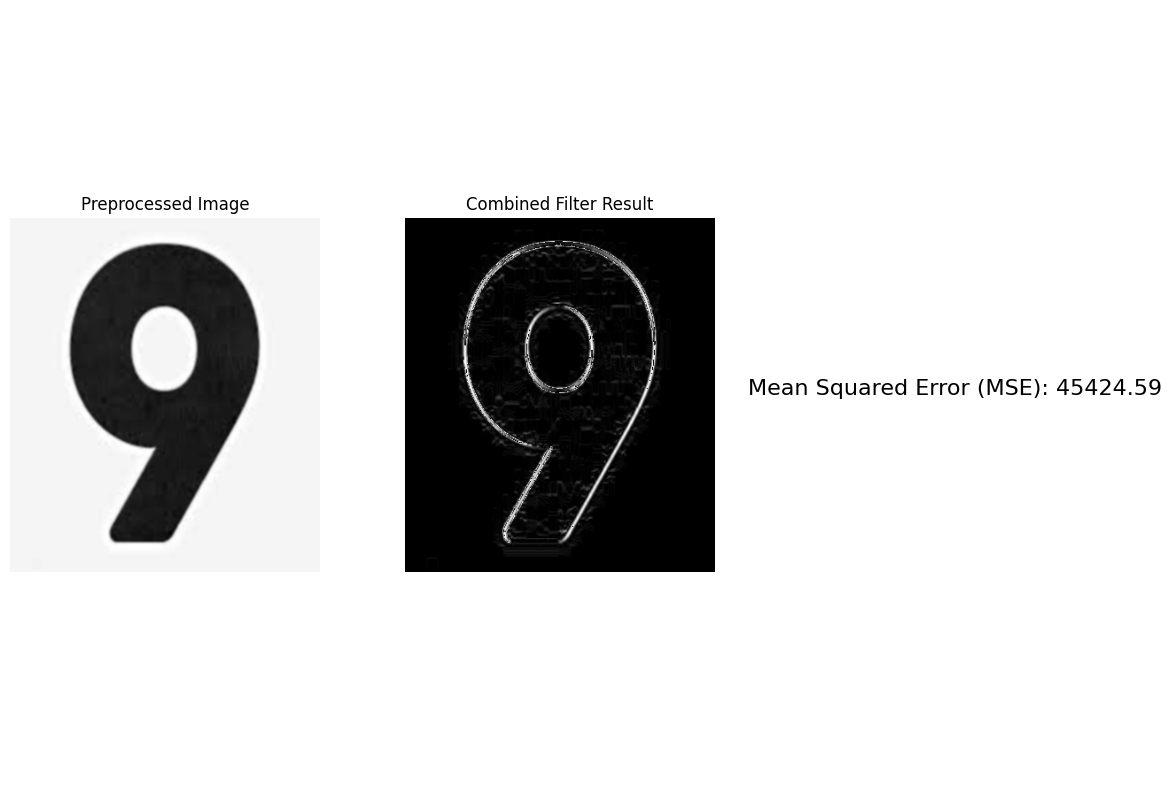

In [168]:

nine_filter = None

### Code Here ###

import numpy as np
import matplotlib.pyplot as plt
import cv2

def read_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (350, 400))
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
    return blurred_image

image_path = '/Users/hassanadnan/Desktop/CV_PA1/Target_Images/nine.png'
preprocessed_image = read_and_preprocess_image(image_path)

filtered_circular = cv2.filter2D(preprocessed_image, -1, circular_filter)
filtered_lrDiag = cv2.filter2D(preprocessed_image, -1, lrDiag_filter)
filtered_rlDiag = cv2.filter2D(preprocessed_image, -1, rlDiag_filter)
filtered_v = cv2.filter2D(preprocessed_image, -1, v_filter)
filtered_h = cv2.filter2D(preprocessed_image, -1, h_filter)

combined_filter = (filtered_circular + filtered_lrDiag + filtered_rlDiag + filtered_v + filtered_h) / 5

combined_filter_display = cv2.normalize(combined_filter, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

mse = np.mean((preprocessed_image.astype("float") - combined_filter) ** 2)

# Display the results
plt.figure(figsize=(12, 8))

# Original Preprocessed Image
plt.subplot(1, 3, 1)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

# Combined Filter Result
plt.subplot(1, 3, 2)
plt.imshow(combined_filter_display, cmap='gray')
plt.title('Combined Filter Result')
plt.axis('off')

# Display MSE
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=16, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()


#################

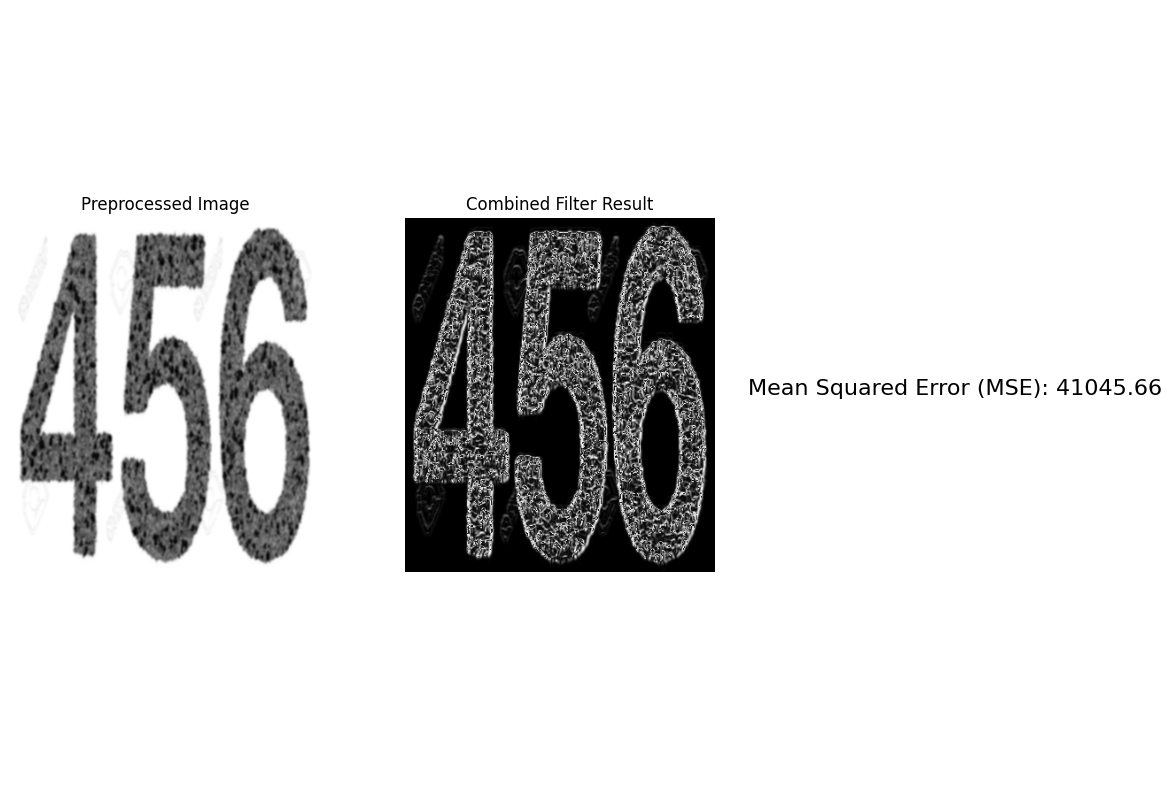

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to read and preprocess the image
def read_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (350, 400))
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
    return blurred_image

# Load and preprocess the multi-digit image
image_path = '/Users/hassanadnan/Desktop/CV_PA1/Target_Images/multi_digits.jpg'
preprocessed_image = read_and_preprocess_image(image_path)

# Apply the individual filters
filtered_circular = cv2.filter2D(preprocessed_image, -1, circular_filter)
filtered_lrDiag = cv2.filter2D(preprocessed_image, -1, lrDiag_filter)
filtered_rlDiag = cv2.filter2D(preprocessed_image, -1, rlDiag_filter)
filtered_v = cv2.filter2D(preprocessed_image, -1, v_filter)
filtered_h = cv2.filter2D(preprocessed_image, -1, h_filter)

# Combine the filters
combined_filter = (filtered_circular + filtered_lrDiag + filtered_rlDiag + filtered_v + filtered_h) / 5

# Convert the combined filter to uint8 for display
combined_filter_display = cv2.normalize(combined_filter, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Calculate Mean Squared Error (MSE)
mse = np.mean((preprocessed_image.astype("float") - combined_filter) ** 2)

# Display the results
plt.figure(figsize=(12, 8))

# Original Preprocessed Image
plt.subplot(1, 3, 1)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

# Combined Filter Result
plt.subplot(1, 3, 2)
plt.imshow(combined_filter_display, cmap='gray')
plt.title('Combined Filter Result')
plt.axis('off')

# Display MSE
plt.subplot(1, 3, 3)
plt.text(0.5, 0.5, f'Mean Squared Error (MSE): {mse:.2f}', fontsize=16, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()


### Filter Bank for texture detection to classify images

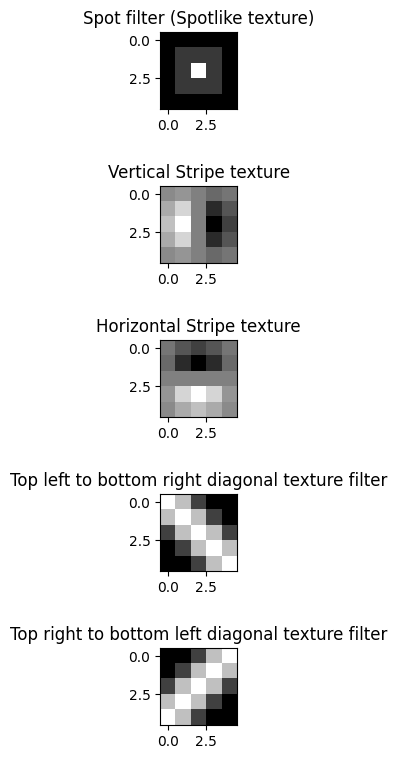

In [114]:
# Spot filter (Spotlike texture)
spot = np.array([[-1, -1, -1, -1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1,  1,  8,  1, -1],
                 [-1,  1,  1,  1, -1],
                 [-1, -1, -1, -1, -1]])

# Vertical filter (Vertical Stripe texture)
vertical = np.array([[1, 2, 0, -2, -1],
                     [4, 8, 0, -8, -4],
                     [6,12, 0,-12, -6],
                     [4, 8, 0, -8, -4],
                     [1, 2, 0, -2, -1]])

# Horizontal filter (Horizontal Stripe texture)
horizontal = np.array([[-1, -4, -6, -4, -1],
                      [-2, -8,-12, -8, -2],
                      [ 0,  0,  0,  0,  0],
                      [ 2,  8, 12,  8,  2],
                      [ 1,  4,  6,  4,  1]])

# Diagonal filter (top left To bottom right)
diagonal_tlTbr = np.array([
                      [ 2,  1, -1, -2, -2],
                      [ 1,  2,  1, -1, -2],
                      [-1,  1,  2,  1, -1],
                      [-2, -1,  1,  2,  1],
                      [-2, -2, -1,  1,  2]])

# Diagonal filter (top right To bottom left)
diagonal_trTbl = np.array([
                      [-2, -2, -1,  1,  2],
                      [-2, -1,  1,  2,  1],
                      [-1,  1,  2,  1, -1],
                      [ 1,  2,  1, -1, -2],
                      [ 2,  1, -1, -2, -2]])

fig, axarr = plt.subplots(5, 1)
axarr[0].set_title('Spot filter (Spotlike texture)')
axarr[0].imshow(spot,cmap='gray')

axarr[1].set_title('Vertical Stripe texture')
axarr[1].imshow(vertical,cmap='gray')

axarr[2].set_title('Horizontal Stripe texture')
axarr[2].imshow(horizontal,cmap='gray')

axarr[3].set_title('Top left to bottom right diagonal texture filter')
axarr[3].imshow(diagonal_tlTbr,cmap='gray')

axarr[4].set_title('Top right to bottom left diagonal texture filter')
axarr[4].imshow(diagonal_trTbl,cmap='gray')

fig.set_size_inches(6, 9)
plt.subplots_adjust(hspace=1)

## Image Classification 

In [169]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Read and preprocess images
def read_and_preprocess_image(image_path, target_size=(256, 256)):
    try:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize(target_size)
        return np.array(image)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None



filter_bank = [spot, vertical, horizontal, diagonal_tlTbr, diagonal_trTbl]

# Step 3: Apply filters and perform average pooling
def apply_filters_and_pool(image, filters, pool_size=8):
    feature_vectors = []
    for filter in filters:
        filtered_image = cv2.filter2D(image, -1, filter)
        # Average pooling
        pooled_image = cv2.resize(filtered_image, (32, 32))
        feature_vector = pooled_image.flatten()  # Flatten 32x32 to 1024 elements
        feature_vectors.append(feature_vector)
    return np.array(feature_vectors)

# Step 4: Create feature matrix for all images in a folder
def create_feature_matrix(folder_path, filters):
    feature_matrix = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            print(f"Attempting to read image: {image_path}")  
            image = read_and_preprocess_image(image_path)
            
            if image is None:  
                print(f"Skipping file: {filename}")
                continue
            
            feature_vector = apply_filters_and_pool(image, filters)
            feature_matrix.append(feature_vector.flatten())  # Flatten to 1D vector
            
    return np.array(feature_matrix)

# Step 5: Read training images and create feature matrix
train_folder = '/Users/hassanadnan/Desktop/CV_PA1/classification/train'
print(f"Reading training images from: {train_folder}")
train_features = create_feature_matrix(train_folder, filter_bank)

# Output the shape of the feature matrix
print(f"Feature matrix shape: {train_features.shape}")


Reading training images from: /Users/hassanadnan/Desktop/CV_PA1/classification/train
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/8.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/4.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/5.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/7.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/6.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/2.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/train/3.jpg
Feature matrix shape: (7, 5120)


In [170]:

import os
import numpy as np
import cv2
from PIL import Image

# Step 1: Read and preprocess images
def read_and_preprocess_image(image_path, target_size=(256, 256)):
    try:
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize(target_size)
        return np.array(image)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None



# Step 2: Apply filters and perform average pooling
def apply_filters_and_pool(image, filters, pool_size=8, stride=8):
    feature_vectors = []
    for filter in filters:
        filtered_image = cv2.filter2D(image, -1, filter)
        # Average pooling
        pooled_image = cv2.resize(filtered_image, (32, 32))
        feature_vector = pooled_image.flatten()  # Flatten 32x32 to 1024 elements
        feature_vectors.append(feature_vector)
    return np.array(feature_vectors)

# Step 3: Create feature vectors for test images
def create_test_feature_vectors(test_folder, filters):
    test_features = []
    for filename in os.listdir(test_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(test_folder, filename)
            print(f"Attempting to read image: {image_path}")
            image = read_and_preprocess_image(image_path)
            if image is None:  # Skip if the image couldn't be read
                print(f"Skipping file: {filename}")
                continue
            feature_vector = apply_filters_and_pool(image, filters)
            test_features.append(feature_vector.flatten())  # Flatten to 1D vector
    return np.array(test_features)

# Step 4: Classify test images based on Euclidean distance
def classify_test_images(test_features, train_features, train_labels):
    predicted_labels = []
    for test_feature in test_features:
        distances = np.linalg.norm(train_features - test_feature, axis=1)
        closest_index = np.argmin(distances)
        predicted_labels.append(train_labels[closest_index])
    return predicted_labels

# Step 5: Main evaluation process
test_folder = '/Users/hassanadnan/Desktop/CV_PA1/classification/test'
print(f"Reading test images from: {test_folder}")
test_features = create_test_feature_vectors(test_folder, filter_bank)
train_labels = [2,3,4,5,6,7,8]
# Step 6: Classify test images using training features and labels
predicted_labels = classify_test_images(test_features, train_features, train_labels)
test_labels = [2,3,4,5,6,7,8]
# Step 7: Calculate accuracy
correct_predictions = 0
for i, predicted_label in enumerate(predicted_labels):
    actual_label = test_labels[i]
    if predicted_label == actual_label:
        correct_predictions += 1
    print(f"Test Image {i + 1}: Predicted = {predicted_label}, Actual = {actual_label}")

accuracy = correct_predictions / len(test_labels) * 100
print(f"Classification Accuracy: {accuracy:.2f}%")


Reading test images from: /Users/hassanadnan/Desktop/CV_PA1/classification/test
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/8.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/4.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/5.png
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/7.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/6.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/2.jpg
Attempting to read image: /Users/hassanadnan/Desktop/CV_PA1/classification/test/3.jpg
Test Image 1: Predicted = 3, Actual = 2
Test Image 2: Predicted = 3, Actual = 3
Test Image 3: Predicted = 7, Actual = 4
Test Image 4: Predicted = 7, Actual = 5
Test Image 5: Predicted = 8, Actual = 6
Test Image 6: Predicted = 8, Actual = 7
Test Image 7: Predicted = 8, Actual = 8
Classification Accuracy: 28.57%
